In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL

from mac0460_5832.utils import *

# MAC0460/5832 - Lista 1: Aprendizado de W-Operadores

### Data de Entrega: 23h55m do dia 05/05/2017


Q1. Encontre, utilizando a técnica de aprendizado de w-operadores vista em sala, o operador 1x3 (1 linha, 3 colunas) capaz de transformar a imagem src1 em dest1 (veja as variáveis abaixo) mostrando a tabela de padrões encontrada. Teste seu operador na imagem src1 e verifique que ele funciona como esperado. Teste seu operador nas imagens images/q1/1_test1.png e images/q1/1_test2.png desenhando as imagens obtidas (sugestão: use a função draw_img do arquivo mac0460_5832/utils.py).

In [2]:
def read_image(filename):
    import PIL.Image
    return pil2array(PIL.Image.open(filename)) 

def pil2array(pil):
    w, h = pil.size
    shape = (h, w)
    image_dtype = np.uint8
    if pil.mode == '1':
        image_dtype = np.bool
    elif pil.mode == 'L':
        image_dtype = np.uint8
    elif pil.mode == 'I;16B':
        image_dtype = np.uint16
    elif pil.mode  in ('F', 'I'):
        image_dtype = np.uint32
    elif pil.mode == 'P':
        pil = pil.convert('RGB')
        shape = (h,w,3)
    elif pil.mode in ('RGB', 'YCbCr'):
        shape = (h,w,3)
        image_dtype = np.uint8
    elif pil.mode in ('RGBA', 'CMYK'):
        shape = (h,w,4)
        image_dtype = np.uint8
    else:
        raise TypeError("Invalid or unimplemented PIL image mode '%s'" % pil.mode)
    img = np.array(pil.getdata(), image_dtype).reshape(shape)
    if img.dtype == bool:
        return img
    return img > 127

def display_image(ima, width=None, height=None):
    from io import BytesIO
    import PIL.Image
    from IPython.display import display, Image

    im = PIL.Image.fromarray(np.uint8(ima))
    bio = BytesIO()
    im.save(bio, format='png')

    if width is None and height is None:
        display(Image(bio.getvalue(),  format='png'))
    elif width is None:
        display(Image(bio.getvalue(), height=height,  format='png'))
    elif height is None:
        display(Image(bio.getvalue(), width=width,  format='png'))
    else:
        display(Image(bio.getvalue(), width=width, height=height,  format='png'))

In [19]:
def insert_counter(key, counter, value):
    if not key in counter:
            counter[key] = [0, 0]
    counter[key][value] += 1
    
def check_counter(key, counter):
    if key in counter:
        return counter[key]
    else: return False

def get_value(i, j, img):
    H, W = np.shape(img)
    if i<0 or j<0 or i>=H or j>=W:
        return False
    else: return img[i][j]
    
def get_pattern(i, j, img, window, win_center):
    h, w = np.shape(window)
    i_cen = i - win_center[0]
    j_cen = j - win_center[1]
    pattern = []
    for k in range(h):
        for l in range(w):
            if window[k][l] == True:
                pattern.append(get_value(i_cen+k, j_cen +l,img))
    return tuple(pattern)

def get_result(counter):
    result = dict()
    for pattern in counter:
        if counter[pattern][0] > counter[pattern][1]:
            result[pattern] = False
        else: result[pattern] = True
    return result

def learn_geral(in_image, out_image, window, center):
    counter = dict()
    for k in range(len(in_image)):
        image = in_image[k]
        H,W = np.shape(image)
        print((H, W))
        for i in range(H):
            for j in range(W):
                pattern = get_pattern(i, j, image, window, center)
                print(k, i, j)
                insert_counter(pattern, counter, out_image[k][i][j])
            
    return get_result(counter)

def apply_learn(result, image, window, center):
    H, W = np.shape(image)
    o_image = np.zeros((H,W), dtype=bool)
    for i in range(H):
        for j in range(W):
            a = get_pattern(i, j, image, window, center)
            o_image[i][j] = check_counter(a, result)
    return o_image
            

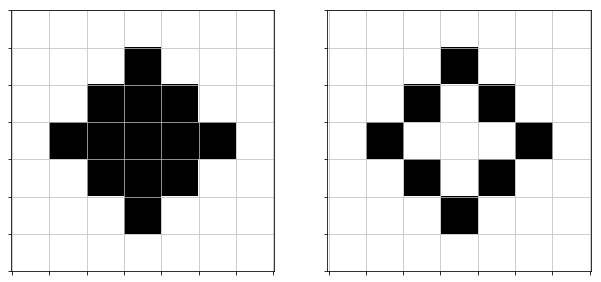

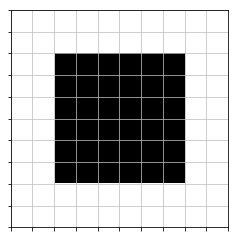

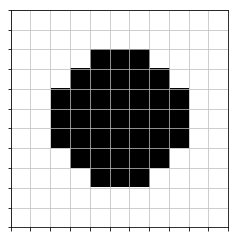

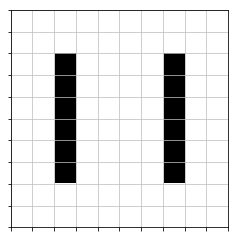

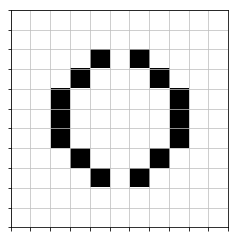

In [4]:
src1 = read_image('images/q1/1_src.png')
dest1 = read_image('images/q1/1_dest.png')

draw_img_pair(src1, dest1)

test1_1 = read_image('images/q1/1_test1.png')
test1_2 = read_image('images/q1/1_test2.png')
draw_img(test1_1)
draw_img(test1_2)

#Code
"""
def learn1 (in_image, out_image):
    H,W = np.shape(in_image)
    print(H, W)
    counter = dict()
    for i in range(H):
        a = (False, in_image[i][0], in_image[i][1])
        insert_counter (a, counter, out_image[i][0])
        for j in range(W-2):
            a = (in_image[i][j], in_image[i][j+1], in_image[i][j+2])
            insert_counter(a, counter, out_image[i][j+1])
        a = (in_image[i][W-2], in_image[i][W-1], False)
        insert_counter(a, counter, out_image[i][W-1])
        
    result = dict()
    for pattern in counter:
        if counter[pattern][0] > counter[pattern][1]:
            result[pattern] = False
        else: result[pattern] = True
    return result


    
def apply_learn2(in_image, result):
    H, W = np.shape(in_image)
    out_image = np.zeros((H, W), dtype=bool)
    for i in range(H):
        a = (False, in_image[i][0], in_image[i][1])
        out_image[i][0] = check_counter(a, result)
        for j in range(W-2):
            a = (in_image[i][j], in_image[i][j+1], in_image[i][j+2])
            out_image[i][j+1] = check_counter(a, result)
        a = (in_image[i][W-2], in_image[i][W-1], False)
    return out_image
"""  
         
window = np.ones((1, 3), dtype=bool)   
center = (0, 1)
result1 = learn_geral([src1], [dest1], window, center)
image_test = apply_learn(result1, test1_1, window, center)
image_test2 = apply_learn(result1, test1_2, window, center)
draw_img(image_test)
draw_img(image_test2)

Q2. Aprenda o operador 3x3 para detecção de bordas. Treine seu operador nas imagens da pastas images/q2/ usando os pares (q2_src\*.png, q2_dest\*.png). Teste seu operador nas imagens images/q2/q2_test.png e images/q2/q2_test2.png. Algumas das imagens de treino são desenhadas abaixo.

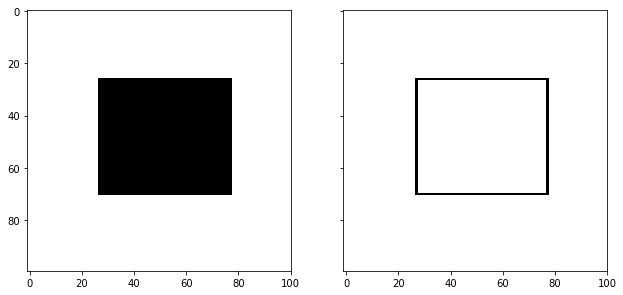

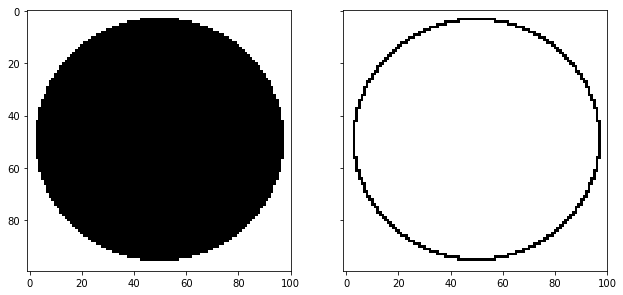

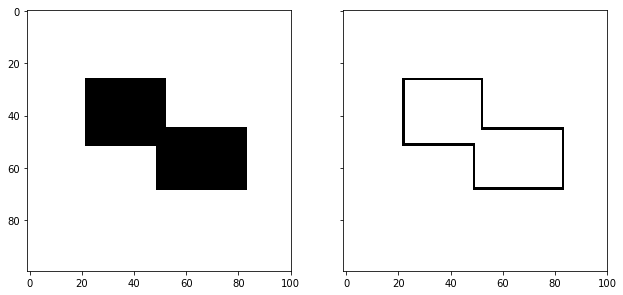

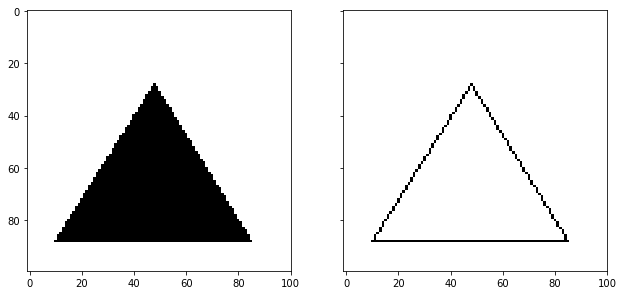

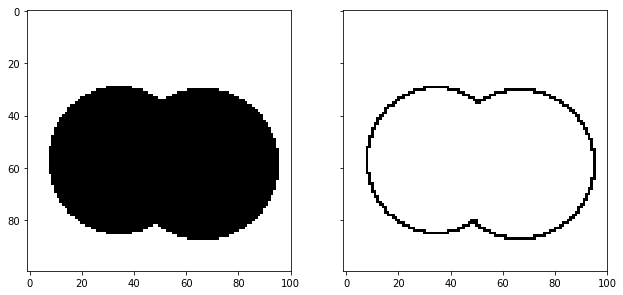

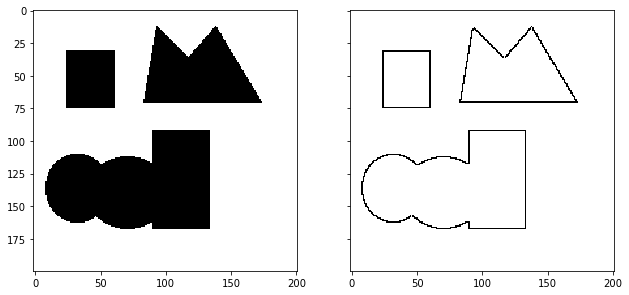

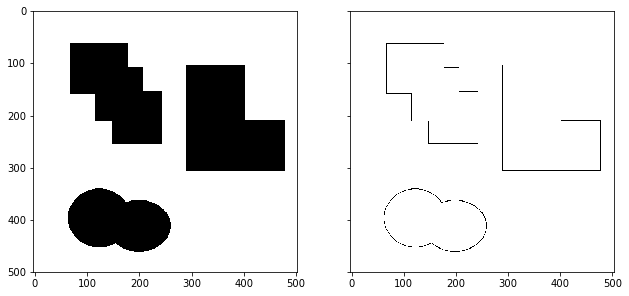

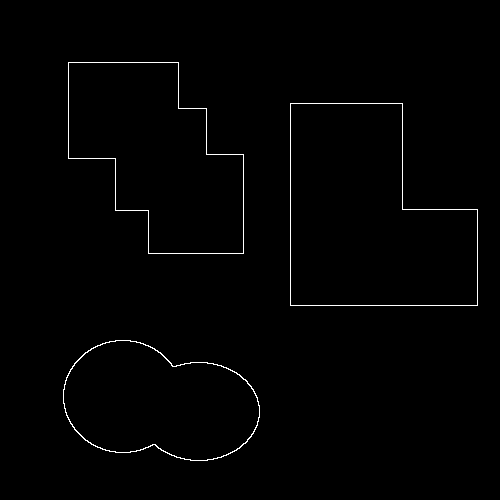

In [5]:
src2_1 = read_image('images/q2/q2_src1.png')
src2_2 = read_image('images/q2/q2_src2.png')
src2_3 = read_image('images/q2/q2_src3.png')
src2_4 = read_image('images/q2/q2_src4.png')
src2_5 = read_image('images/q2/q2_src5.png')


dest2_1 = read_image('images/q2/q2_dest1.png')
dest2_2 = read_image('images/q2/q2_dest2.png')
dest2_3 = read_image('images/q2/q2_dest3.png')
dest2_4 = read_image('images/q2/q2_dest4.png')
dest2_5 = read_image('images/q2/q2_dest5.png')

draw_img_pair(src2_1, dest2_1)
draw_img_pair(src2_2, dest2_2)
draw_img_pair(src2_3, dest2_3)
draw_img_pair(src2_4, dest2_4)
draw_img_pair(src2_5, dest2_5)

test2_1 = read_image('images/q2/q2_test.png')
test2_2 = read_image('images/q2/q2_test2.png')
"""
def learn3 (in_image, out_image):
    counter = dict()
    n = len(in_image)
    for k in range(n):
        image = in_image[k]
        oimage = out_image[k]
        H,W = np.shape(image)
        for i in range(H-2):
            for j in range(W-2):
                a = (image[i][j], image[i][j+1], image[i][j+2],
                     image[i+1][j], image[i+1][j+1], image[i+1][j+2],
                     image[i+2][j], image[i+2][j+1], image[i+2][j+2])
                if not a in counter:
                    counter[a] = [0, 0]
                counter[a][oimage[i+1][j+1]] += 1
                
    result = dict()
    for pattern in counter:
        if counter[pattern][0] > counter[pattern][1]:
            result[pattern] = False
        else: result[pattern] = True
    return result

def apply_learn(in_image, result):
    H, W = np.shape(in_image)
    out_image = np.zeros((H, W), dtype=bool)
    for i in range(H-2):
        for j in range(W-2):
            a = (in_image[i][j], in_image[i][j+1], in_image[i][j+2],
                in_image[i+1][j], in_image[i+1][j+1], in_image[i+1][j+2],
                in_image[i+2][j], in_image[i+2][j+1], in_image[i+2][j+2])
            if a in result:
                out_image[i+1][j+1] = result[a]
    return out_image
"""




in_image = [src2_1, src2_2, src2_3, src2_4, src2_5]
out_image = [dest2_1, dest2_2, dest2_3, dest2_4, dest2_5]
window2 = np.ones((3, 3), dtype=bool)
center2 = (1, 1)
result2 = learn_geral(in_image, out_image, window2, center2)
    

image_1 = apply_learn(result2, test2_1, window2, center2)
image_2 =  apply_learn(result2, test2_2, window2, center2)
draw_img_pair(test2_1, image_1)
draw_img_pair(test2_2, image_2)

display_image(image_2*255)


Q3. Use o algoritmo de aprendizado para obter um operador capaz de eliminar ruído. Use no treinamento as imagens images/q3/q3_src\*.png sempre com o mesmo target images/q3/q3_dest.png. Teste a janela com 5 elementos (cruz). Teste seu operador nas imagens images/q3/q3_test1.png e images/q3/q3_test2.png. Calcule e plote os erros $E_{in}$ e $E_{out}$ obtidos durante o treinamento.

(15, 15)
(15, 15)
True
(15, 15)
0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
0 0 10
0 0 11
0 0 12
0 0 13
0 0 14
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 1 10
0 1 11
0 1 12
0 1 13
0 1 14
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
0 2 10
0 2 11
0 2 12
0 2 13
0 2 14
0 3 0
0 3 1
0 3 2
0 3 3
0 3 4
0 3 5
0 3 6
0 3 7
0 3 8
0 3 9
0 3 10
0 3 11
0 3 12
0 3 13
0 3 14
0 4 0
0 4 1
0 4 2
0 4 3
0 4 4
0 4 5
0 4 6
0 4 7
0 4 8
0 4 9
0 4 10
0 4 11
0 4 12
0 4 13
0 4 14
0 5 0
0 5 1
0 5 2
0 5 3
0 5 4
0 5 5
0 5 6
0 5 7
0 5 8
0 5 9
0 5 10
0 5 11
0 5 12
0 5 13
0 5 14
0 6 0
0 6 1
0 6 2
0 6 3
0 6 4
0 6 5
0 6 6
0 6 7
0 6 8
0 6 9
0 6 10
0 6 11
0 6 12
0 6 13
0 6 14
0 7 0
0 7 1
0 7 2
0 7 3
0 7 4
0 7 5
0 7 6
0 7 7
0 7 8
0 7 9
0 7 10
0 7 11
0 7 12
0 7 13
0 7 14
0 8 0
0 8 1
0 8 2
0 8 3
0 8 4
0 8 5
0 8 6
0 8 7
0 8 8
0 8 9
0 8 10
0 8 11
0 8 12
0 8 13
0 8 14
0 9 0
0 9 1
0 9 2
0 9 3
0 9 4
0 9 5
0 9 6
0 9 7
0 9 8
0 9 9
0 9 10
0 9 11
0 9 12
0 9 13
0 9 14
0 10 0
0 10 1
0 10

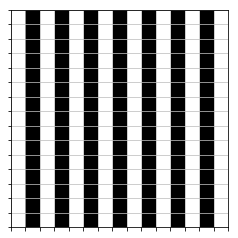

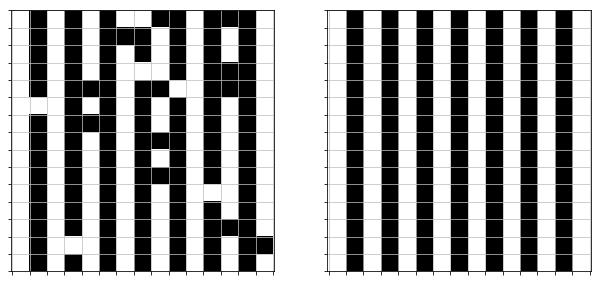

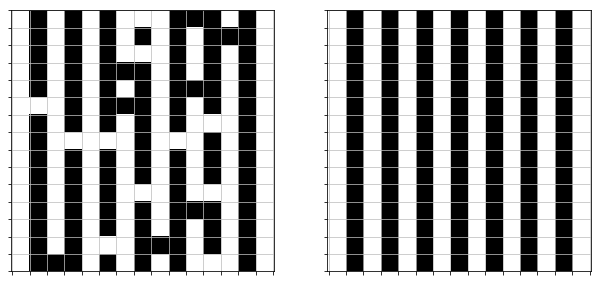

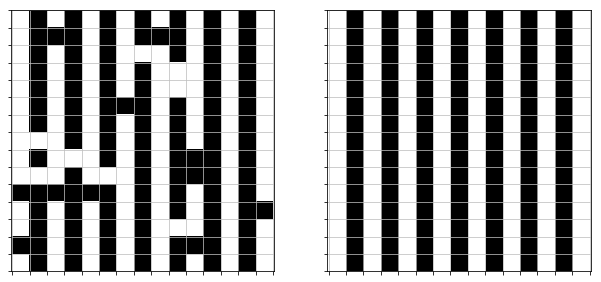

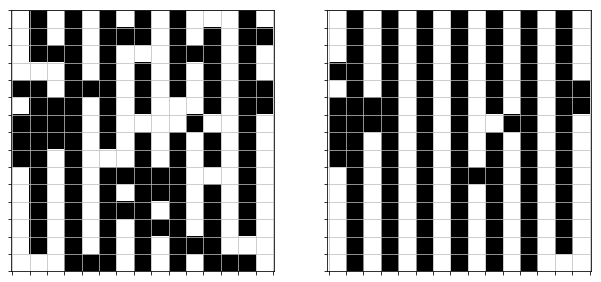

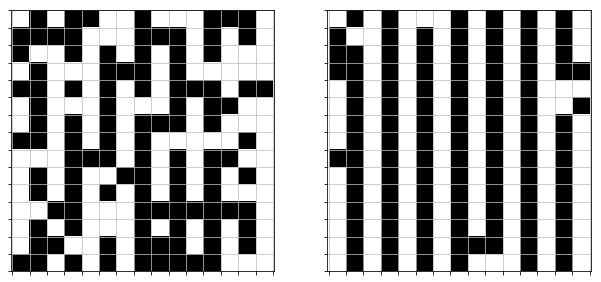

In [22]:
src3_1 = read_image('images/q3/q3_src1.png')
src3_2 = read_image('images/q3/q3_src2.png')
src3_3 = read_image('images/q3/q3_src3.png')
src3_4 = read_image('images/q3/q3_src4.png')
src3_5 = read_image('images/q3/q3_src5.png')
dest3 = read_image('images/q3/q3_dest.png')
print(np.shape(dest3))
print(np.shape(src3_4))
in_image3 = [src3_1, src3_2, src3_3, src3_4, src3_5]
out_image3 = [dest3, dest3, dest3, dest3, dest3]
print(out_image[3][0][1])
window = [[False, True, False],
          [True, True, True],
          [False, True, False]]
center = (1, 1)
result3 = learn_geral(in_image3, out_image3, window, center)

test3_1 = read_image('images/q3/q3_test1.png')
test3_2 = read_image('images/q3/q3_test2.png')
test1 = apply_learn(result3, test3_1, window, center)
test2 = apply_learn(result3, test3_2, window, center)
draw_img(dest3)

draw_img_pair(src3_1, dest3)
draw_img_pair(src3_2, dest3)
draw_img_pair(src3_3, dest3)

draw_img_pair(test3_1, test1)
draw_img_pair(test3_2, test2)


Q4. Projete um operador para aprender a extrair a letra 's' de imagens de texto. Para isso utilize os pares de imagens q4_src\*.png q4_dest\*.png da pasta images/q4/train. Teste seu operador nas imagens da pasta images/q4/test. Utilize a composição de janelas pequenas. Avalie o erro do seu operador comparando a saída obtida por ele com a saída esperada (imagens q4_gt\*.png da pasta images/q4/test).

In [ ]:
dest4_1a = read_image("images/q4/train/q4_dest1a.png")
src4_1a = read_image("images/q4/train/q4_src1a.png")
dest4_1b = read_image("images/q4/train/q4_dest1b.png")
src4_1b = read_image("images/q4/train/q4_src1b.png")
draw_img_pair(src4_1a, dest4_1a, figsz=(15, 6))
draw_img_pair(src4_1b, dest4_1b, figsz=(15, 6))

Q5. Utilizando a técnica de multiresolução, aprenda o operador capaz de remover ruído das imagens da pasta images/q5/. Utilize os pares de imagens (q5_src\*.png, q5_dest.png) para o treinamento e depois teste seu  operador nas imagens q5_test1.png e q5_test2.png.

In [ ]:
dest5 = read_image("images/q5/q5_dest.png")
src5_1 = read_image("images/q5/q5_src1.png")
src5_2 = read_image("images/q5/q5_src2.png")
draw_img(dest5)
draw_img(src5_1)
draw_img(src5_2)

Q6. Utilize a técnica de envelope, como visto em sala, para remover ruído de imagens. Use o mesmo dataset da questão anterior e as funções de morfologia disponíveis em mac0460_5832/utils.py para definir as funções $\alpha$ e $\beta$. Um exemplo de erosão em uma das imagens de treino é mostrado abaixo. Comente sobre a escolha das funções $\alpha$ e $\beta$.

In [ ]:
src6_1 = read_image("images/q5/q5_src1.png")
draw_img(erosion(src6_1, se_box(2)))

Q7. Utilize a técnica de envelope com multiresolução para aprender um operador capaz de remover ruído de imagens. Para cada uma das janelas, defina funções $\alpha$ e $\beta$ (podem ser diferentes). Compare o resultado obtido aplicando a mistura de técnicas com os resultados das duas questões anteriores.

Q8. A função gen_rand_imgs abaixo retorna um par de imagens. A primeira contém alguns pontos gerados aleatoriamente. A segunda é a dilatação da primeira por um elemento estruturante em forma de cruz. Aprenda o operador capaz de realizar essa transformação, gerando os pares de src e dest. Crie os dados de treinamento baseado na equação vista em sala ($m(\epsilon, \delta, H) = \frac{1}{\epsilon}ln\frac{|H|}{\delta}$). Compare o resultado obtido pelo seu classificador (gere mais pares para teste e ter uma estimativa de $E_{out}$) para $\epsilon = [0.2, 0.1]$ e $\delta = [0.3, 0.2]$.

In [ ]:
def gen_rand_imgs():
    noise = np.zeros((20, 20)).astype(bool)
    num_pixels = 20
    x = np.random.randint(0, 20, num_pixels)
    y = np.random.randint(0, 20, num_pixels)

    for i in range(num_pixels):
        noise[x[i], y[i]] = 1

    return noise, dilation(noise, se_cross(1))

src5_1, dest5_1 = gen_rand_imgs()
src5_2, dest5_2 = gen_rand_imgs()
draw_img_pair(src5_1, dest5_1)
draw_img_pair(src5_2, dest5_2)